In [103]:
import torch
import seaborn as sns
import numpy as np
import torch.nn as nn
import pandas as pd


In [104]:
#load data

cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)

In [105]:
X_value = cars.wt.values.tolist()
Y_value = cars.mpg.values.tolist()

x = torch.tensor(X_value).reshape(-1,1)
y = torch.tensor(Y_value).reshape(-1,1)




In [106]:
class LinearRegressionTorch(nn.Module):
    def __init__ (self,input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out 
    



In [107]:
input_size = 1
output_size = 1
model = LinearRegressionTorch(input_size, output_size)

LR = 0.02
NUM_EPOCHS = 200

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)


In [108]:
mean_losses,slope,bias = [],[],[]
BATCH_SIZE = 8
for epoch in range(NUM_EPOCHS):
    losses = []
    for i in range(0, len(x), BATCH_SIZE):
        optimizer.zero_grad()

        y_pred = model(x[i:i+BATCH_SIZE])

        loss = loss_function(y_pred, y[i:i+BATCH_SIZE])
        loss.backward()


        optimizer.step()

        for name,param in model.named_parameters():
            if name == 'linear.weight':
                slope.append(param.item())
            if name == 'linear.bias':
                bias.append(param.item())

        losses.append(loss.item())
    mean_losses.append(np.mean(losses))

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1} Avg-loss = {mean_losses[epoch]:.4f}, slope = {slope[-1]:.4f}, bias = {bias[-1]:.4f}')

Epoch 1 Avg-loss = 216.8206, slope = 4.8655, bias = 1.8105
Epoch 11 Avg-loss = 101.7847, slope = 3.8928, bias = 6.1375
Epoch 21 Avg-loss = 80.5478, slope = 2.7819, bias = 9.8677
Epoch 31 Avg-loss = 64.1602, slope = 1.8058, bias = 13.1455
Epoch 41 Avg-loss = 51.5157, slope = 0.9480, bias = 16.0260
Epoch 51 Avg-loss = 41.7605, slope = 0.1942, bias = 18.5571
Epoch 61 Avg-loss = 34.2353, slope = -0.4682, bias = 20.7814
Epoch 71 Avg-loss = 28.4312, slope = -1.0503, bias = 22.7361
Epoch 81 Avg-loss = 23.9554, slope = -1.5618, bias = 24.4537
Epoch 91 Avg-loss = 20.5044, slope = -2.0113, bias = 25.9630
Epoch 101 Avg-loss = 17.8443, slope = -2.4062, bias = 27.2894
Epoch 111 Avg-loss = 15.7942, slope = -2.7533, bias = 28.4550
Epoch 121 Avg-loss = 14.2148, slope = -3.0584, bias = 29.4792
Epoch 131 Avg-loss = 12.9983, slope = -3.3264, bias = 30.3792
Epoch 141 Avg-loss = 12.0618, slope = -3.5619, bias = 31.1702
Epoch 151 Avg-loss = 11.3410, slope = -3.7689, bias = 31.8652
Epoch 161 Avg-loss = 10.78

<Axes: >

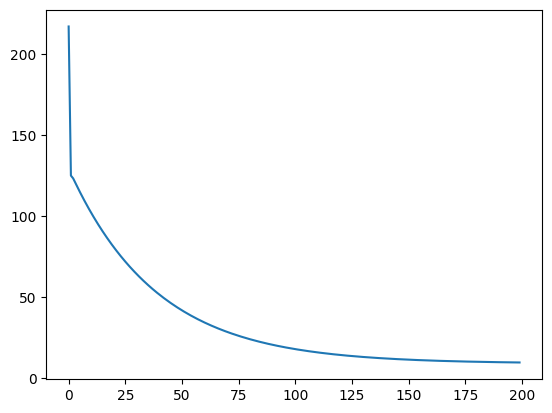

In [109]:
sns.lineplot(x=range(NUM_EPOCHS), y=mean_losses)

<Axes: >

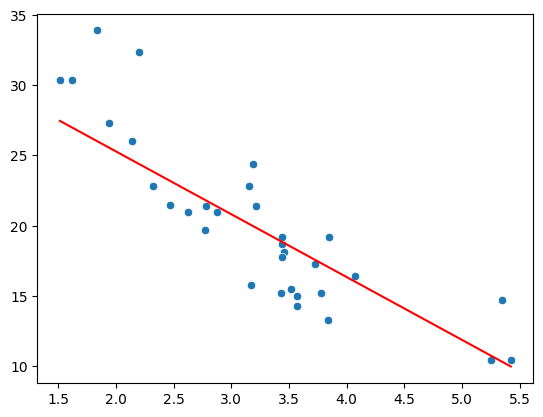

In [ ]:
sns.scatterplot(x=X_value, y=Y_value)
sns.lineplot(x=X_value, y=model(x).data.numpy().reshape(-1), color='red')

In [111]:
torch.save(model.state_dict(), 'linear_regression_model.pth')
